# Predicting in this project 
1. Tax Efficiency Index
2. Migration - Driven Tax change (AGI = Adjust gross income)
3. cluster locations by fiscal behaviour

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the Data

In [19]:
df = pd.read_csv("Residence_tax.csv")

In [20]:
df.head()

,Tax Year,Resident Type,Place of Residence,Country,State,County,Income Class,Disclosure,Number of All Returns,NY AGI of All Returns (in thousands) *,Deductions of All Returns (in thousands),Dependent Exemptions of All Returns (in thousands),Taxable Income of All Returns (in thousands),Tax Before Credits of All Returns (in thousands),Tax Liability of All Returns (in thousands) **,Place of Residence Sort Order,Income Class Sort Order
0,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"40,000 - 49,999",d/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205,6
1,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"50,000 - 59,999",d/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205,7
2,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"60,000 - 74,999",d/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205,8
3,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"Under 5,000",NaN,632.0,-2644.0,105.0,0.0,2.0,0.0,0.0,150,1
4,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"5,000 - 9,999",NaN,58.0,433.0,255.0,0.0,21.0,1.0,1.0,150,2


In [21]:
df.columns

Index(['Tax Year', 'Resident Type', 'Place of Residence', 'Country', 'State',
       'County', 'Income Class', 'Disclosure', 'Number of All Returns',
       'NY AGI of All Returns (in thousands) *',
       'Deductions of All Returns (in thousands)',
       'Dependent Exemptions of All Returns (in thousands)',
       'Taxable Income of All Returns (in thousands)',
       'Tax Before Credits of All Returns (in thousands)',
       'Tax Liability of All Returns (in thousands) **',
       'Place of Residence Sort Order', 'Income Class Sort Order'],
      dtype='object')

# Handle Missing Values

In [22]:
df.isnull().sum()

Tax Year                                                  0
Resident Type                                             0
Place of Residence                                        0
Country                                                   0
State                                                     0
County                                                    0
Income Class                                              0
Disclosure                                            23439
Number of All Returns                                   296
NY AGI of All Returns (in thousands) *                  296
Deductions of All Returns (in thousands)                296
Dependent Exemptions of All Returns (in thousands)      296
Taxable Income of All Returns (in thousands)            296
Tax Before Credits of All Returns (in thousands)        296
Tax Liability of All Returns (in thousands) **          296
Place of Residence Sort Order                             0
Income Class Sort Order                 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Tax Year                                            23735 non-null  int64  
 1   Resident Type                                       23735 non-null  object 
 2   Place of Residence                                  23735 non-null  object 
 3   Country                                             23735 non-null  object 
 4   State                                               23735 non-null  object 
 5   County                                              23735 non-null  object 
 6   Income Class                                        23735 non-null  object 
 7   Disclosure                                          296 non-null    object 
 8   Number of All Returns                               23439 non-null  float64


# We drop the "Disclosure" column because there more than 70% data is missing and for other columns we drop the rows of missing values . 

In [24]:
df.drop('Disclosure' , inplace = True , axis = 1)
df.dropna(axis = 0 , inplace = True)

# Formatting the data Where columns having random values. 


In [25]:
format_data = ['All Other Countries +++',
       'Residence Unknown ++++', 'Grand Total, Full-Year Nonresident',
       'Grand Total, Part-Year Resident', 'All Other States','NYS Unclassified +','Residence Unknown ++',
       'All' , 'Not Applicable' , 'All - Excluding New Nork' , 'All Other States' , 
       'All Other Countries +++','Residence Unknown ++++' , 'Total']


# df['Place of Residence'].isin(format_data).sum()
# df['Country'].isin(format_data).sum()
# df['State'].isin(format_data).sum()
# df['County'].isin(format_data).sum()

columns_names = ['Place of Residence' , 'Country' , 'State' , 'County' , 'Income Class']

for i in columns_names :
    print(f"{i} : {df[i].isin(format_data).sum()}")


Place of Residence : 1340
Country : 832
State : 1939
County : 10367
Income Class : 1816


In [26]:
place_to_drop = df[df["Place of Residence"].isin(format_data)].index
country_to_drop = df[df["Country"].isin(format_data)].index
state_to_drop = df[df["State"].isin(format_data)].index
income_to_drop = df[df["Income Class"].isin(format_data)].index

all_rows_to_drop = (
    place_to_drop
    .union(country_to_drop)
    .union(state_to_drop)
    .union(income_to_drop)
)

# Drop ONCE
df.drop(all_rows_to_drop , inplace=True)

In [27]:
county_to_drop = df[df['County'].isin(format_data)].index

County Column having higher number of random values . So , we will replace with "Unknown" .

In [28]:
county_to_drop = df[df['County'].isin(format_data)].index

In [29]:
df['County'] = df['County'].replace(format_data , 'Unknown')

In [30]:

for i in columns_names :
    print(f"{i} : {df[i].isin(format_data).sum()}")


Place of Residence : 0
Country : 0
State : 0
County : 0
Income Class : 0


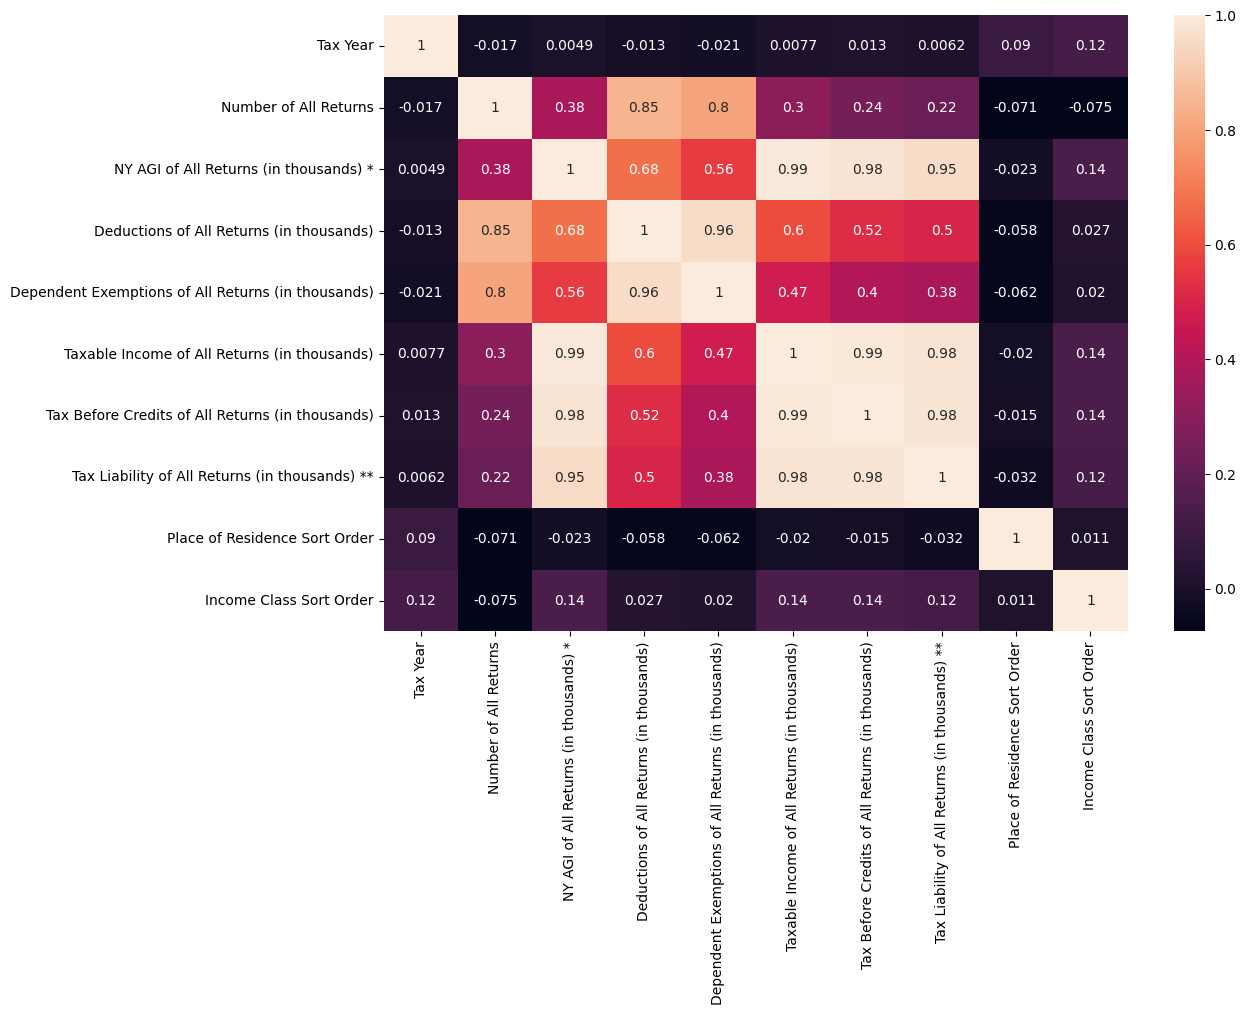

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()


We found many high correlated features but we are not dropping because it highly helpful to predicting the problem statement. 

# Outlier Detection 

In [32]:
df.describe()

,Tax Year,Number of All Returns,NY AGI of All Returns (in thousands) *,Deductions of All Returns (in thousands),Dependent Exemptions of All Returns (in thousands),Taxable Income of All Returns (in thousands),Tax Before Credits of All Returns (in thousands),Tax Liability of All Returns (in thousands) **,Place of Residence Sort Order,Income Class Sort Order
count,19136.000000,1.913600e+04,1.913600e+04,1.913600e+04,19136.000000,1.913600e+04,1.913600e+04,1.913600e+04,19136.000000,19136.000000
mean,2007.167956,1.463579e+04,1.071581e+06,1.789528e+05,8108.414298,8.754314e+05,5.904082e+04,4.551925e+04,66.732912,6.561141
std,4.611798,8.020389e+04,7.298601e+06,9.343613e+05,46651.038935,6.622207e+06,4.893662e+05,4.479119e+05,47.274468,3.537004
min,1999.000000,1.000000e+01,-1.262669e+07,7.000000e+00,0.000000,0.000000e+00,0.000000e+00,-4.674790e+05,1.000000,1.000000
25%,2003.000000,2.260000e+02,1.169025e+04,3.227500e+03,47.000000,4.881750e+03,2.390000e+02,2.700000e+01,26.750000,4.000000
50%,2008.000000,1.594500e+03,7.017700e+04,1.855300e+04,588.000000,4.456100e+04,2.357000e+03,1.114000e+03,51.500000,7.000000
75%,2011.000000,4.932250e+03,2.459650e+05,5.536400e+04,2481.250000,1.693080e+05,9.573750e+03,6.314250e+03,116.000000,10.000000
max,2014.000000,1.372544e+06,2.382972e+08,1.962783e+07,904387.000000,2.265283e+08,1.826171e+07,1.708919e+07,149.000000,13.000000


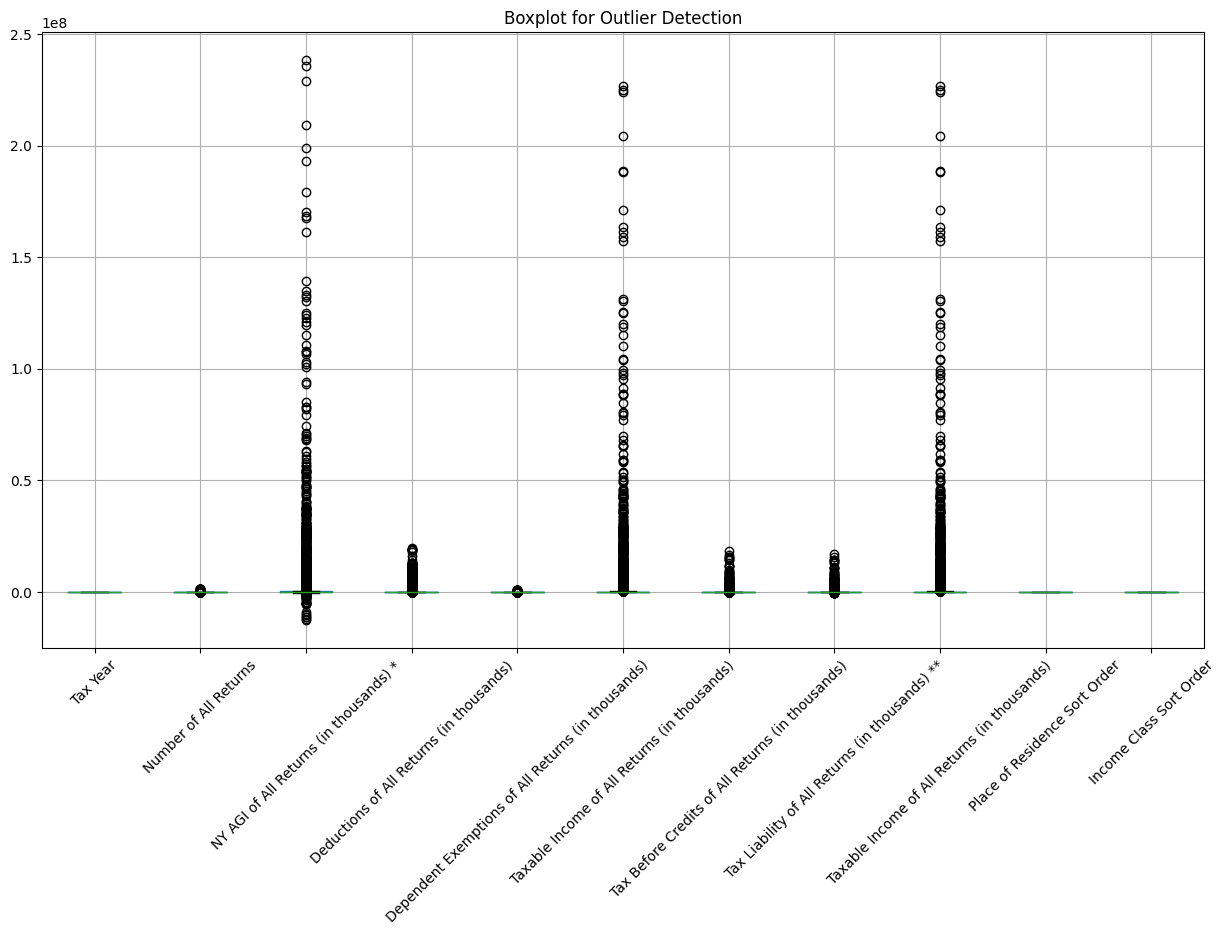

In [33]:
numeric_cols = [
    'Tax Year',
    'Number of All Returns',
    'NY AGI of All Returns (in thousands) *',
    'Deductions of All Returns (in thousands)',
    'Dependent Exemptions of All Returns (in thousands)',
    'Taxable Income of All Returns (in thousands)',
    'Tax Before Credits of All Returns (in thousands)',
    'Tax Liability of All Returns (in thousands) **',
    'Taxable Income of All Returns (in thousands)',
    'Place of Residence Sort Order',
    'Income Class Sort Order'
]

plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

We are not removing the outliers because It is a real financial dataset and financial data has such types of values (rich countires , wealthy taxpayers). It will destroy the real distribution of tax data ,also our dataset is all about the taxes .

In [34]:
# plt.figure(figsize=(7,5))
# sns.scatterplot(x=df['Avg_Taxable_Income_by_State'], 
#                 y=df['Taxable Income of All Returns (in thousands)'])
# plt.title("Scatter Plot to Detect Outliers")
# plt.show()


In [35]:
df['Tax Liability of All Returns'] = df['Tax Liability of All Returns (in thousands) **']
df['NY AGI of All Returns']= df['NY AGI of All Returns (in thousands) *']
df['Dependent Exemptions of All Returns'] = df['Dependent Exemptions of All Returns (in thousands)']
df['Deductions of All Returns'] = df['Deductions of All Returns (in thousands)']
df['Taxable Income of All Returns'] = df['Taxable Income of All Returns (in thousands)']
df['Tax Before Credits of All Returns'] = df['Tax Before Credits of All Returns (in thousands)']

In [36]:
drop_duplicte_columns = [
    'Tax Liability of All Returns (in thousands) **',
    'NY AGI of All Returns (in thousands) *',
    'Dependent Exemptions of All Returns (in thousands)',
    'Deductions of All Returns (in thousands)',
    'Taxable Income of All Returns (in thousands)',
    'Tax Before Credits of All Returns (in thousands)'
]

df.drop(drop_duplicte_columns , axis = 1 , inplace = True)

# Feature Engineering

1. Tax Efficiency Index (TEI) : TEI is our target variable . It capture the efficiency of converting income into tax.

In [37]:
df['Tax_efficienct_index'] = (df['Tax Liability of All Returns'] / df['NY AGI of All Returns']) * 100

2. Tax Change : It will helpful in tax liability to know increase or descrease due to migration . We do classification problem on this .
TaxChange=TaxLiability(current)−TaxLiability(previous)
It will help us to know about the migration spike . 
if taxchage happen flag is 1 otherwise 0 .
	​


In [38]:
# Sort by region + year
df = df.sort_values(by=['Place of Residence', 'Tax Year'])

# Calculate Tax Change per region
df['TaxChange'] = df.groupby('Place of Residence')['Tax Liability of All Returns'].diff()

df['TaxChange'] = df['TaxChange'].fillna(0)
df['Tax_Change_Flag'] = df['TaxChange'].apply(lambda x: 1 if x > 0 else 0)

3. Deduction Ratio : It will help us in clustering . because raw "Deduction" is missing. 
For Example :- 
County A: 500,000 deductions
County B: 2,000 deductions
This difference may be due to population, not behavior. So , we normalize this using the deduction ratio . 

In [39]:
df['Deduction_Ratio'] = df['Deductions of All Returns'] / df['NY AGI of All Returns']

In [40]:
df.drop(['Place of Residence Sort Order' , 'Income Class Sort Order' ,'Dependent Exemptions of All Returns' , 'Tax Before Credits of All Returns' ] , axis =1 ,inplace = True)